# 比赛介绍

## 赛事背景

数字化转型、可持续发展是制造业实现高质量发展的重要课题。如何更好地融合现实与数字世界释放产业潜能，如何利用先进的技术合理利用资源实现高效绿色生产，都是制造业从业者在不断探索的问题。西门子致力于“科技有为”，不断以创新的技术、杰出的解决方案和产品为客户创造价值；践行“赋能于人”，鼓励优秀人才发挥创造力，为产业升级和可持续发展贡献智慧和力量。
 

2022年是西门子进入中国市场的第150年。在这个有特殊意义的年份举办西门子极客挑战赛，我们希望同广大青年学生一道，以创新技术助力中国制造业转型升级。本次比赛围绕人工智能的应用和网络信息安全两大议题展开，旨在激发大家科技探索热情，更好地利用人工智能助力研发、解决实际问题，挖掘更具价值的算法优化，并为数字化转型提供网络安全保障。本次挑战赛对在校大学生和西门子员工开放，四个赛道奖金共计300,000元。
 

## 比赛任务

机器阅读理解(Machine Reading Comprehension)和问答（Questing Answering）是自然语言处理领域的重要方向，可以让人工智能模型阅读文本，并回答与文本相关的问题。
 
本次比赛的任务为中文阅读理解/问答，选手可以用开源的中文阅读理解数据集（如CMRC、WebQA等）进行训练，同时在验证集和测试集上获得较高的F1分数。验证集和测试集的文本主要来自制造业、智能工业等相关领域。
 

## 西门子在中国

西门子股份公司（总部位于柏林和慕尼黑）是一家专注于工业、基础设施、交通和医疗领域的科技公司。从更高效节能的工厂、更具韧性的供应链、更智能的楼宇和电网，到更清洁、更舒适的交通以及先进的医疗系统，西门子致力于让科技有为，为客户创造价值。通过融合现实与数字世界，西门子赋能客户推动产业和市场变革，帮助数十亿计的人们，共创每一天。西门子持有上市公司西门子医疗的多数股权，西门子医疗是全球重要的医疗科技供应商，塑造着医疗产业的未来。此外，西门子持有西门子能源的少数股权，西门子能源是全球输电和发电领域的国际企业。西门子自1872年进入中国，150年来始终以创新的技术、杰出的解决方案和产品坚持不懈地对中国的发展提供全面支持。截至2021年9月30日，西门子在中国拥有超过3万名员工。西门子已经发展成为中国社会和经济的一部分，并竭诚与中国携手合作，共同致力于实现可持续发展。
 
 
# 比赛规则

## 提交规则

1.  在比赛的初赛阶段，选手可以根据验证集直接提交预测结果，每天限提交一次。
2.  在比赛的复赛阶段，选手需要提交一个包括了模型的Docker，并在竞赛平台后台不发布的测试集上运行。复赛阶段共可提交一次。
    1）硬件配置：vcpu 4*Intel Xeon E5-2686 v4, 60G内存, 1块NVIDIA Tesla K80 GPU内存12G;
    2）模型大小限制：10G;
    3）时间限制：平均每个问题的推断时间不超过3s。
     

## 知识产权

1.  获奖模型说明和代码必须遵守GPL v3协议，并发布在组织者指定的网站上。
2.  比赛作品的知识产权归参赛作者所有。主办方有权将参赛作品、作品相关、参赛团队信息用于宣传品、相关出版物、指定及授权媒体发布、官方网站浏览及下载、展览（含巡展）等活动项目。
     

## 外部数据和开源代码

1.  允许使用比赛发布日前已经开源的代码、工具和的外部标注数据用于训练，但不能使用需要授权的代码或工具。
2.  本次比赛发布的数据仅能用来预测，不能用于训练，但选手可以使用相关的第三方语料进行训练。
3.  参赛选手只能通过比赛讨论区分享代码。代码必须开源且免费。私下分享代码将被视为违规行为。
4.  参赛作品必须保证原创性，不违反任何中华人民共和国的有关法律，不侵犯任何第三方知识产权或者其他权利；一经发现或经权利人提出并查证，主办方将取消其比赛成绩并进行严肃处理。
5.  比赛结束后，获奖团队需要提交一份比赛报告；一份训练代码和详细的代码说明；可复现比赛结果的模型，以及运行模型来复现结果的详细说明，如环境信息、基本设置、依赖包，运行方式和命令等内容；一份PPT，介绍比赛方法，包括数据处理、网络架构与技术方案描述、做了哪些方向的尝试以及相关结果（即使是不太成功的尝试）、最终结果、模型运行资源和时间效率、团队介绍。
     
     
# 数据格式

本次比赛数据格式与问答或阅读理解数据集格式类似。数据文件格式为`tsv`。其中，`paragraph`为一个文本字符串，代表文章；`questions`为问题。问题的答案为文本字符串中的子字符串，`answer`为问题的答案。

# 评测方法

本次比赛采用模糊匹配率（F1-score），即计算预测结果与标准答案之间的字级别(character-level)匹配程度。

# BERT SPAN思路

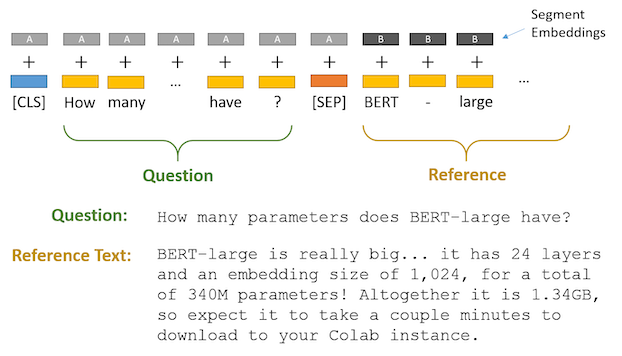

In [1]:
import pandas as pd
import codecs
import os
import re
import json

In [2]:
# https://storage.googleapis.com/cluebenchmark/tasks/cmrc2018_public.zip

In [3]:
train = json.load(open('./dataset/cmrc2018_public/train.json'))
dev = json.load(open('./dataset/cmrc2018_public/dev.json'))

In [4]:
train['data'][0]['paragraphs'][0]



{'id': 'TRAIN_186',
 'context': '范廷颂枢机（，），圣名保禄·若瑟（），是越南罗马天主教枢机。1963年被任为主教；1990年被擢升为天主教河内总教区宗座署理；1994年被擢升为总主教，同年年底被擢升为枢机；2009年2月离世。范廷颂于1919年6月15日在越南宁平省天主教发艳教区出生；童年时接受良好教育后，被一位越南神父带到河内继续其学业。范廷颂于1940年在河内大修道院完成神学学业。范廷颂于1949年6月6日在河内的主教座堂晋铎；及后被派到圣女小德兰孤儿院服务。1950年代，范廷颂在河内堂区创建移民接待中心以收容到河内避战的难民。1954年，法越战争结束，越南民主共和国建都河内，当时很多天主教神职人员逃至越南的南方，但范廷颂仍然留在河内。翌年管理圣若望小修院；惟在1960年因捍卫修院的自由、自治及拒绝政府在修院设政治课的要求而被捕。1963年4月5日，教宗任命范廷颂为天主教北宁教区主教，同年8月15日就任；其牧铭为「我信天主的爱」。由于范廷颂被越南政府软禁差不多30年，因此他无法到所属堂区进行牧灵工作而专注研读等工作。范廷颂除了面对战争、贫困、被当局迫害天主教会等问题外，也秘密恢复修院、创建女修会团体等。1990年，教宗若望保禄二世在同年6月18日擢升范廷颂为天主教河内总教区宗座署理以填补该教区总主教的空缺。1994年3月23日，范廷颂被教宗若望保禄二世擢升为天主教河内总教区总主教并兼天主教谅山教区宗座署理；同年11月26日，若望保禄二世擢升范廷颂为枢机。范廷颂在1995年至2001年期间出任天主教越南主教团主席。2003年4月26日，教宗若望保禄二世任命天主教谅山教区兼天主教高平教区吴光杰主教为天主教河内总教区署理主教；及至2005年2月19日，范廷颂因获批辞去总主教职务而荣休；吴光杰同日真除天主教河内总教区总主教职务。范廷颂于2009年2月22日清晨在河内离世，享年89岁；其葬礼于同月26日上午在天主教河内总教区总主教座堂举行。',
 'qas': [{'question': '范廷颂是什么时候被任为主教的？',
   'id': 'TRAIN_186_QUERY_0',
   'answers': [{'text': '1963年', 'answer_start': 30}]},
  {'question': '1990年，

In [ ]:
范廷颂枢机（，），圣名保禄·若瑟（），是越南罗马天主教枢机。1963年被任为主教；1990年被擢升为天主教河内总教区宗座署理；1994年被擢升为总主教，同年年底被擢升为枢机；2009年2月离世。范廷颂于1919年6月15日在越南宁平省天主教发艳教区出生；童年时接受良好教育后，被一位越南神父带到河内继续其学业。范廷颂于1940年在河内大修道院完成神学学业。范廷颂于1949年6月6日在河内的主教座堂晋铎；及后被派到圣女小德兰孤儿院服务。1950年代，范廷颂在河内堂区创建移民接待中心以收容到河内避战的难民。

1954年，法越战争结束，越南民主共和国建都河内，当时很多天主教神职人员逃至越南的南方，但范廷颂仍然留在河内。翌年管理圣若望小修院；惟在1960年因捍卫修院的自由、自治及拒绝政府在修院设政治课的要求而被捕。1963年4月5日，教宗任命范廷颂为天主教北宁教区主教，同年8月15日就任；其牧铭为「我信天主的爱」。由于范廷颂被越南政府软禁差不多30年，因此他无法到所属堂区进行牧灵工作而专注研读等工作。范廷颂除了面对战争、贫困、被当局迫害天主教会等问题外，也秘密恢复修院、创建女修会团体等。

In [1]:
from transformers import BertTokenizerFast, BertForQuestionAnswering

tokenizer = BertTokenizerFast.from_pretrained('hfl/chinese-bert-wwm-ext')
model = BertForQuestionAnswering.from_pretrained('hfl/chinese-bert-wwm-ext')
# 数值回归？

Some weights of the model checkpoint at hfl/chinese-bert-wwm-ext were not used when initializing BertForQuestionAnswering: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at hfl/chinese-

In [6]:
paragraphs = []
questions = []
start_positions = []
end_positions = []

for paragraph in train['data']:
    for qa in paragraph['paragraphs'][0]['qas']:
        # doc query 进行成组的存储
        paragraphs.append(paragraph['paragraphs'][0]['context'])
        questions.append(qa['question'])

        # answer 的位置信息
        start_positions.append(qa['answers'][0]['answer_start'])
        end_positions.append(qa['answers'][0]['answer_start'] + len(qa['answers'][0]['text']))

In [7]:
# 对输入的文本进行编码
train_encodings = tokenizer(paragraphs, questions,
                            return_tensors='pt', truncation=True, padding=True,
                            max_length=512)

# answer的位置 是否 保留  或 截断丢了
train_encodings['start_positions'] = [train_encodings.char_to_token(idx, x) if train_encodings.char_to_token(idx, x) != None else -1
                                      for idx, x in enumerate(start_positions)]

train_encodings['end_positions'] = [train_encodings.char_to_token(idx, x-1) if train_encodings.char_to_token(idx, x-1) != None else -1
                                    for idx, x in enumerate(end_positions)]

In [8]:
paragraphs = []
questions = []
start_positions = []
end_positions = []
for paragraph in dev['data']:
    for qa in paragraph['paragraphs'][0]['qas']:
        paragraphs.append(paragraph['paragraphs'][0]['context'])
        questions.append(qa['question'])
        start_positions.append(qa['answers'][0]['answer_start'])
        end_positions.append(qa['answers'][0]['answer_start'] + len(qa['answers'][0]['text']))

In [9]:
val_encodings = tokenizer(paragraphs, questions,
                          return_tensors='pt', truncation=True, padding=True,
                          max_length=512)

val_encodings['start_positions'] = [val_encodings.char_to_token(idx, x) if val_encodings.char_to_token(idx, x) != None else -1
                                    for idx, x in enumerate(start_positions)]
val_encodings['end_positions'] = [val_encodings.char_to_token(idx, x-1) if val_encodings.char_to_token(idx, x) != None else -1
                                  for idx, x in enumerate(end_positions)]

In [10]:
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset

import torch


class SquadDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings.input_ids)


train_dataset = SquadDataset(train_encodings)

In [11]:
from torch.utils.data import DataLoader
from transformers import AdamW

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model.to(device)
model.train()

# batch size 8， maxlen 512
# 1080ti 1h左右
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

optim = AdamW(model.parameters(), lr=5e-5)

for epoch in range(3):
    for idx, batch in enumerate(train_loader):
        optim.zero_grad()
        
        # query doc 编码之后的结果
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        
        # answer位置 标签
        start_positions = batch['start_positions'].to(device)
        end_positions = batch['end_positions'].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask,
                        start_positions=start_positions,
                        end_positions=end_positions)
        loss = outputs[0]
        loss.backward()
        optim.step()
        
        # answer 位置信息
        start_pred = torch.argmax(outputs['start_logits'], dim=1)
        end_pred = torch.argmax(outputs['end_logits'], dim=1)
        
        acc1 = ((start_pred == start_positions).sum() / len(start_pred)).item()
        acc2 = ((end_pred == end_positions).sum() / len(start_pred)).item()

        if idx % 10 == 0:
            print(loss.item(), acc1, acc2)
            with codecs.open('log.log', 'a') as up:
                up.write('{3}\t{0}\t{1}\t{2}\n'.format(loss.item(), acc1, acc2,
                                                       str(epoch) + '/' + str(idx) + '/' + str(len(train_loader))))

model.eval()

/home/lyz/.local/lib/python3.6/site-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
/home/lyz/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


6.239781379699707 0.0 0.0
5.119513511657715 0.25 0.125
4.307534217834473 0.0 0.0
3.657071590423584 0.25 0.25
3.994892120361328 0.125 0.0
3.5724167823791504 0.25 0.125
4.39090633392334 0.25 0.375
3.3797082901000977 0.125 0.0
3.2229537963867188 0.25 0.5
2.276233196258545 0.375 0.375
3.208955764770508 0.25 0.25
3.192233085632324 0.25 0.125
3.5208284854888916 0.125 0.25
2.700723171234131 0.375 0.125
2.355203151702881 0.25 0.375
1.872420072555542 0.5 0.5
1.6186556816101074 0.75 0.5
1.7738497257232666 0.375 0.375
1.8177597522735596 0.5 0.25
2.129871368408203 0.5 0.375
2.268611192703247 0.25 0.5
2.6676275730133057 0.25 0.375
3.206892967224121 0.375 0.375
2.5760245323181152 0.375 0.375
1.622800588607788 0.625 0.625
2.118241310119629 0.375 0.125
1.3577072620391846 0.5 0.625
2.054483652114868 0.625 0.5
1.696335792541504 0.375 0.625
1.8592212200164795 0.375 0.375
2.00042724609375 0.5 0.5
2.010857582092285 0.375 0.875
1.8965941667556763 0.625 0.375
1.9856832027435303 0.125 0.625
1.6717373132705688

KeyboardInterrupt: 

In [12]:
def predcit(doc, query):
    # print(doc)
    # print('提问：', query)
    item = tokenizer([doc, query], max_length=512, return_tensors='pt', truncation=True, padding=True,)
    with torch.no_grad():
        input_ids = torch.tensor(item['input_ids']).to(device).reshape(1, -1)
        attention_mask = torch.tensor(item['attention_mask']).to(device).reshape(1, -1)

        outputs = model(input_ids[:, :512], attention_mask[:, :512])
        start_pred = torch.argmax(outputs['start_logits'], dim=1)
        end_pred = torch.argmax(outputs['end_logits'], dim=1)

    try:
        start_pred = item.token_to_chars(0, start_pred)
        end_pred = item.token_to_chars(0, end_pred)
    except:
        return ''

    if start_pred.start > end_pred.end:
        return ''
    else:
        return doc[start_pred.start:end_pred.end]

In [13]:
dev['data'][0]

{'paragraphs': [{'id': 'DEV_0',
   'context': '《战国无双3》（）是由光荣和ω-force开发的战国无双系列的正统第三续作。本作以三大故事为主轴，分别是以武田信玄等人为主的《关东三国志》，织田信长等人为主的《战国三杰》，石田三成等人为主的《关原的年轻武者》，丰富游戏内的剧情。此部份专门介绍角色，欲知武器情报、奥义字或擅长攻击类型等，请至战国无双系列1.由于乡里大辅先生因故去世，不得不寻找其他声优接手。从猛将传 and Z开始。2.战国无双 编年史的原创男女主角亦有专属声优。此模式是任天堂游戏谜之村雨城改编的新增模式。本作中共有20张战场地图（不含村雨城），后来发行的猛将传再新增3张战场地图。但游戏内战役数量繁多，部分地图会有兼用的状况，战役虚实则是以光荣发行的2本「战国无双3 人物真书」内容为主，以下是相关介绍。（注：前方加☆者为猛将传新增关卡及地图。）合并本篇和猛将传的内容，村雨城模式剔除，战国史模式可直接游玩。主打两大模式「战史演武」&「争霸演武」。系列作品外传作品',
   'qas': [{'question': '《战国无双3》是由哪两个公司合作开发的？',
     'id': 'DEV_0_QUERY_0',
     'answers': [{'text': '光荣和ω-force', 'answer_start': 11},
      {'text': '光荣和ω-force', 'answer_start': 11},
      {'text': '光荣和ω-force', 'answer_start': 11}]},
    {'question': '男女主角亦有专属声优这一模式是由谁改编的？',
     'id': 'DEV_0_QUERY_1',
     'answers': [{'text': '村雨城', 'answer_start': 226},
      {'text': '村雨城', 'answer_start': 226},
      {'text': '任天堂游戏谜之村雨城', 'answer_start': 219}]},
    {'question': '战国史模式主打哪两个模式？',
     'id': 'DEV_0_QUERY_2',
     'answ

In [14]:
predcit(dev['data'][0]['paragraphs'][0]['context'],
        dev['data'][0]['paragraphs'][0]['qas'][0]['question'])

/home/lyz/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/home/lyz/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


'由光荣和ω-force'

In [29]:
predcit('物联网概念最早出现于比尔盖茨1995年《未来之路》一书，在《未来之路》中，比尔盖茨已经提及物联网概念，只是当时受限于无线网络、硬件及传感设备的发展，并未引起世人的重视。1998年，美国麻省理工学院创造性地提出了当时被称作EPC系统的“物联网”的构想。', '1998年，美国麻省理工学院创造性地提出了什么？')

/home/lyz/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/home/lyz/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


'当时被称作EPC系统的“物联网”的构想。'

In [30]:
import pandas as pd

submit_df = pd.read_csv('biendata-Siemens03/coding_future_qa_validation_release.tsv', sep='\t')

In [33]:
answer = []
for row in submit_df.iterrows():
    answer.append(predcit(row[1].paragraph, row[1].question))

/home/lyz/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/home/lyz/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


In [34]:
submit_df['answer'] = answer
submit_df[['id', 'answer']].to_csv('submit.csv', sep='\t', index=None)

# Prompt

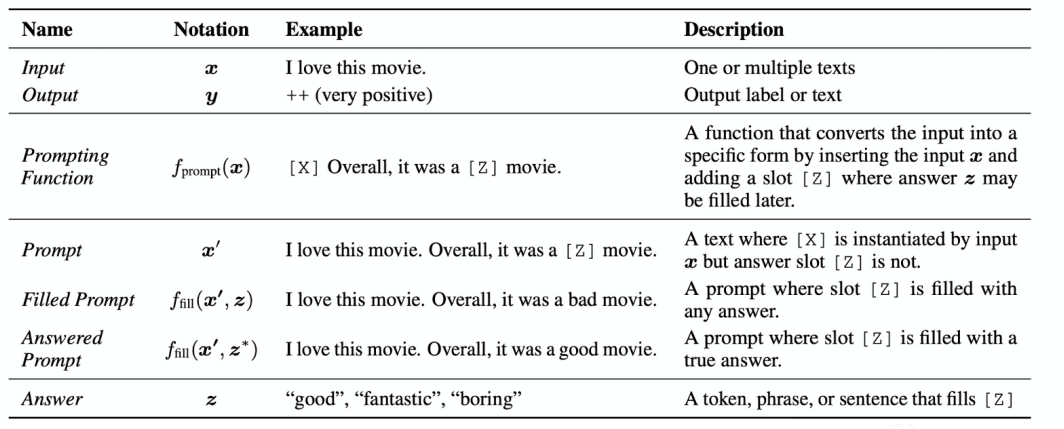

# 改进思路

1. 训练多折模型得到，对结果进行多次预测，对于预测的结果进行投票。
2. 调换query 和 doc的顺序，也可以尝试对文本进行分段训练。
3. 使用BERT MASK在比赛数据集上进行预训练。